In [2]:
import yfinance as yf
import pandas as pd

ai_stocks = ['NVDA', 'AMD', 'TSM', 'INTC', 'AAPL']

stock_data = yf.download(ai_stocks, start='2018-01-01', end='2025-02-01', interval='1mo')

nvidia = yf.Ticker('NVDA')
nvda_fundamentals = nvidia.history(period='12y')

print(stock_data.head())

[*********************100%***********************]  5 of 5 completed


Price           Close                                              High  \
Ticker           AAPL    AMD       INTC      NVDA        TSM       AAPL   
Date                                                                      
2018-01-01  39.344822  13.74  40.413342  6.078579  37.892090  42.322182   
2018-02-01  41.856895  12.11  41.378765  5.984606  36.252964  42.444377   
2018-03-01  39.587822  10.05  44.017567  5.730728  36.595844  43.296969   
2018-04-01  38.993225  10.88  43.628784  5.565184  32.155174  42.221034   
2018-05-01  44.092117  13.73  46.654560  6.240478  32.364243  44.917945   

Price                                              ...       Open         \
Ticker        AMD       INTC      NVDA        TSM  ...       AAPL    AMD   
Date                                               ...                     
2018-01-01  13.85  42.688375  6.164392  38.945808  ...  39.986355  10.42   
2018-02-01  13.84  42.730354  6.231162  38.410581  ...  39.283726  13.62   
2018-03-01  12.82  

In [36]:
hist_prices = nvda_fundamentals['Close']
eps_ttm = nvidia.info.get("trailingEps")

nvda_fundamentals['PE Ratio'] = hist_prices / eps_ttm
nvda_fundamentals['PE Mean'] = nvda_fundamentals['PE Ratio'].rolling(window=252).mean()
nvda_fundamentals['PE Std'] = nvda_fundamentals['PE Ratio'].rolling(window=252).std()

In [3]:
pe_ratio = nvidia.info['trailingPE']
ps_ratio = nvidia.info['priceToSalesTrailing12Months']
market_cap = nvidia.info['marketCap']/10**9

print(f'Nvidia PE ratio: {pe_ratio}')
print(f'Nvidia PS ratio: {ps_ratio}')
print(f'Nvidia market cap: {market_cap}B')

Nvidia PE ratio: 54.881428
Nvidia PS ratio: 30.020897
Nvidia market cap: 3400.436809728B


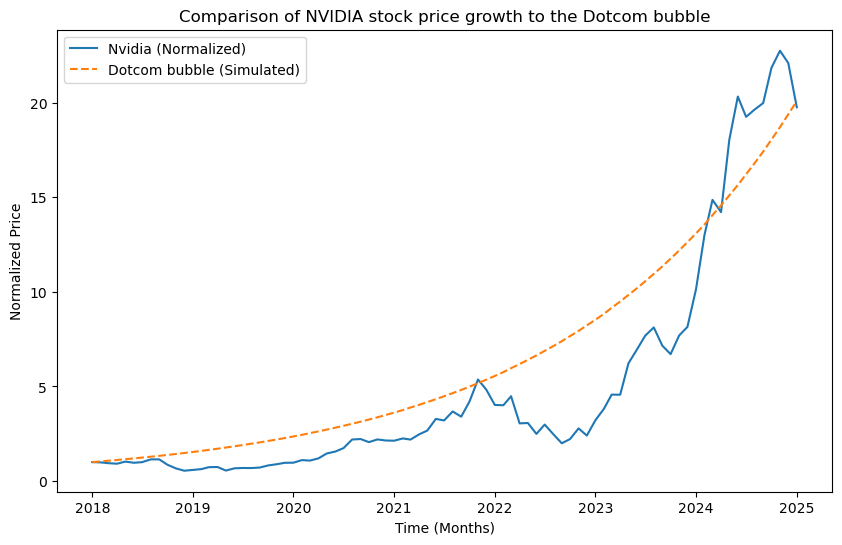

In [10]:
import matplotlib.pyplot as plt
import numpy as np

nvda_prices = stock_data['Close']['NVDA']
nvda_prices_norm = nvda_prices/nvda_prices.iloc[0]

dotcom_growth = np.exp(np.linspace(0, 3, len(nvda_prices)))
dotcom_growth_series = pd.Series(dotcom_growth, index=nvda_prices.index)

plt.figure(figsize=(10, 6))
plt.plot(nvda_prices_norm, label='Nvidia (Normalized)')
plt.plot(dotcom_growth_series, label='Dotcom bubble (Simulated)', linestyle='dashed')
plt.xlabel('Time (Months)')
plt.ylabel('Normalized Price')
plt.title('Comparison of NVIDIA stock price growth to the Dotcom bubble')
plt.legend()
plt.show()

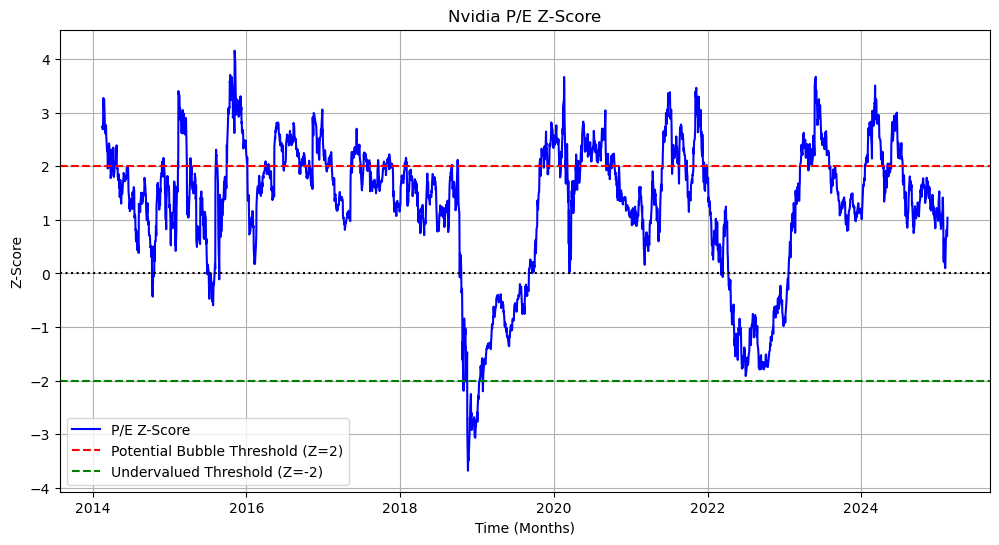

In [38]:
nvda_fundamentals['PE Z-Score'] = (nvda_fundamentals['PE Ratio'] - nvda_fundamentals['PE Mean']) / nvda_fundamentals['PE Std']
nvda_fundamentals.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(nvda_fundamentals.index, nvda_fundamentals['PE Z-Score'], label='P/E Z-Score', color='blue')
plt.axhline(2, color='red', linestyle='dashed', label='Potential Bubble Threshold (Z=2)')
plt.axhline(-2, color='green', linestyle='dashed', label='Undervalued Threshold (Z=-2)')
plt.axhline(0, color='black', linestyle='dotted')
plt.title('Nvidia P/E Z-Score')
plt.legend()
plt.xlabel('Time (Months)')
plt.ylabel('Z-Score')
plt.grid(True)
plt.show()